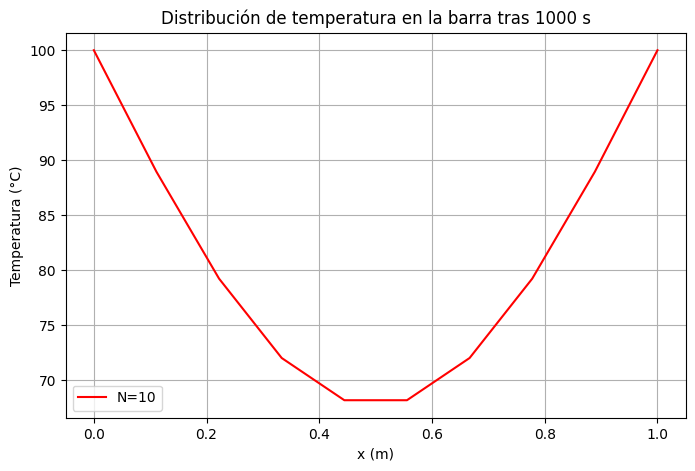

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
alpha = 0.00012  # Difusividad térmica (m^2/s)
L = 1.0  # Longitud de la barra (m)
T_izquierda = 100  # Temperatura en el extremo izquierdo (°C)
T_derecha = 100  # Temperatura en el extremo derecho (°C)
T_inicial = 20  # Temperatura inicial en toda la barra (°C)
tiempo_total = 1000  # Tiempo total de simulación (s)

# Número de puntos en el espacio
N = 10  # Número de divisiones espaciales
dx = L / (N - 1)  # Tamaño del paso espacial

dt = 0.4 * dx**2 / alpha  # Condición de estabilidad CFL para método explícito
Nt = int(tiempo_total / dt)  # Número de pasos de tiempo

# Parámetro lambda de la ecuación
lambd = alpha * dt / dx**2

# Inicialización de la matriz de temperaturas
T = np.ones((N, Nt)) * T_inicial
T[0, :] = T_izquierda  # Condición de frontera izquierda
T[-1, :] = T_derecha  # Condición de frontera derecha

# Método explícito de diferencias finitas
for j in range(0, Nt - 1):
    for i in range(1, N - 1):
        T[i, j+1] = lambd * T[i+1, j] + (1 - 2 * lambd) * T[i, j] + lambd * T[i-1, j]

# Graficar la temperatura en el último instante de tiempo
plt.figure(figsize=(8, 5))
plt.plot(np.linspace(0, L, N), T[:, -1], label=f'N={N}', color='red')
plt.xlabel("x (m)")
plt.ylabel("Temperatura (°C)")
plt.title("Distribución de temperatura en la barra tras 1000 s")
plt.legend()
plt.grid()
plt.show()

c:\Users\1cnac\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


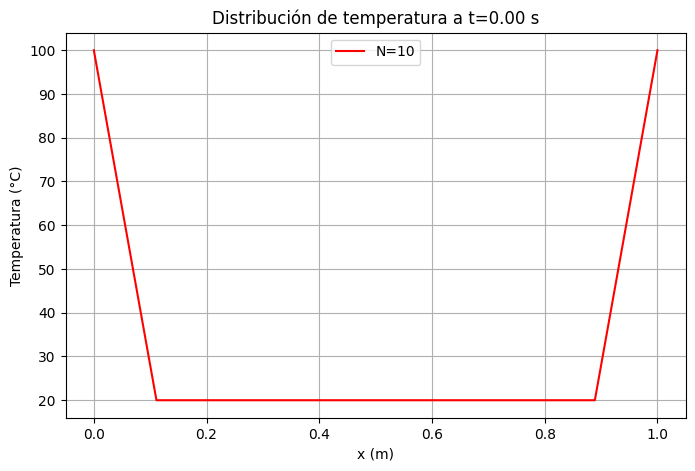

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros del problema
alpha = 0.00012  # Difusividad térmica (m^2/s)
L = 1.0          # Longitud de la barra (m)
T_izquierda = 100  # Temperatura en el extremo izquierdo (°C)
T_derecha = 100    # Temperatura en el extremo derecho (°C)
T_inicial = 20     # Temperatura inicial en toda la barra (°C)
tiempo_total = 1000  # Tiempo total de simulación (s)

# Número de puntos en el espacio
N = 10              # Número de divisiones espaciales
dx = L / (N - 1)    # Tamaño del paso espacial

dt = 0.4 * dx**2 / alpha  # Condición de estabilidad CFL para método explícito
Nt = int(tiempo_total / dt)  # Número de pasos de tiempo

# Parámetro lambda de la ecuación
lambd = alpha * dt / dx**2

# Inicialización de la matriz de temperaturas
T = np.ones((N, Nt)) * T_inicial
T[0, :] = T_izquierda   # Condición de frontera izquierda
T[-1, :] = T_derecha    # Condición de frontera derecha

# Método explícito de diferencias finitas
for j in range(0, Nt - 1):
    for i in range(1, N - 1):
        T[i, j+1] = lambd * T[i+1, j] + (1 - 2 * lambd) * T[i, j] + lambd * T[i-1, j]

# Configuración de la figura
fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(0, L, N)
line, = ax.plot(x, T[:, 0], color='red', label=f'N={N}')
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperatura (°C)")
ax.set_title("Distribución de temperatura en la barra")
ax.legend()
ax.grid()

# Función de actualización para la animación
def update(frame):
    line.set_ydata(T[:, frame])
    ax.set_title(f"Distribución de temperatura a t={frame*dt:.2f} s")
    return line,

# Seleccionamos un paso para reducir el número de frames si Nt es muy grande
step = max(1, Nt // 100)

# Creamos la animación
ani = animation.FuncAnimation(fig, update, frames=range(0, Nt, step),
                              interval=50, blit=True)

plt.show()

